<a href="https://colab.research.google.com/github/jbloewencolon/Analyzing-The-Doctrine-of-Discovery/blob/main/Analyzing_the_DoD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to conduct a language analysis of the intcats comprising the "Doctrine of Christian Discovery." Despite the dataset's limited size, this analysis will delve into sentiment analysis, topic modeling, and comparative text analysis to gain insights into historical perspectives on indigenous peoples, gold, and religious matters.


Step 1: Setting Up the Python Environment
First, we need to set up our Python environment with the necessary libraries.

In [53]:
#!pip install vaderSentiment
#!pip install --upgrade PyPDF2
#!pip install pyLDAvis

# Importing required libraries
import pandas as pd
import PyPDF2
import nltk
import string
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim import corpora, models
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

nltk.download('punkt')
nltk.download('stopwords')

file_path = '/content/drive/MyDrive/Colab Notebooks/DoD/Files/Inter Caetera.pdf'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Step 2: Data Collection and Preprocessing
After sourcing the intcats, we'll convert them into a text-readable format and clean the data.

In [47]:
# Function to preprocess and extract text from PDF
def preprocess_pdf(file_path):
    # Reading the PDF file
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''.join(page.extract_text() for page in reader.pages)

    # Lowercasing and tokenizing
    tokens = word_tokenize(text.lower())

    # Removing stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    words_to_remove = "gilder lehrman collection glc04093 www.gilderlehrman.org notes : translation copied http : //www.catholic -forum.com/saints/pope0214a.htm".split()

    # Properly filtering the tokens
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in words_to_remove]

    return filtered_tokens

# Process the PDF file
intcat = preprocess_pdf(file_path)

In [48]:
# Assuming intcat is your list of words
word_count = len(intcat)

print("Word Count:", word_count)

Word Count: 1107


Step 3: Exploratory Data Analysis (EDA)
We'll start with some basic EDA to understand our dataset better.

Step 4: Sentiment Analysis
Next, we'll analyze the sentiment of the text.

In [49]:
# Using TextBlob for sentiment analysis
blob = TextBlob(" ".join(intcat))
print(blob.sentiment)

# Using Vader Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()
print(analyzer.polarity_scores(" ".join(intcat)))

Sentiment(polarity=0.15193631669535285, subjectivity=0.4311675272518648)
{'neg': 0.024, 'neu': 0.723, 'pos': 0.253, 'compound': 0.9998}


In [50]:
text = " ".join(intcat)
sentences = sent_tokenize(text)
analyzer = SentimentIntensityAnalyzer()

sentiments = []

for sentence in sentences:
    sentiment_score = analyzer.polarity_scores(sentence)
    sentiments.append((sentence, sentiment_score['compound']))

# Sort the sentences by sentiment score
sentiments.sort(key=lambda x: x[1])

# Most negative sentences
most_negative = sentiments[:5]  # Adjust number as needed

# Most positive sentences
most_positive = sentiments[-5:]  # Adjust number as needed

print("Most Negative Sentences:")
for sentence, score in most_negative:
    print(f"{sentence} -> Score: {score}")

print("\nMost Positive Sentences:")
for sentence, score in most_positive:
    print(f"{sentence} -> Score: {score}")


Most Negative Sentences:
furthermore , penalty excommunication `` late sententie '' incurred `` ipso facto , '' anyone thus contravene , strictly forbid persons whatsoever rank , even imperial royal , whatsoever estate , degree , rder , condition , dare without special permit aforesaid heirs successors , go purpose trade reason islands mainlands , found found , discovered discovered , towards west south , drawing establishing line arctic pole antarctic pole , matter whether mainlands islands , found found , lie direction india toward quarter whatsoever , said line distant one hundred leagues towards west south , aforesaid , islands commonly known azores cape verde ; apostolic constitutions ordinances decrees whatsoever contrary notwithstanding . -> Score: -0.6551
pope alexander vi . -> Score: 0.0
proviso however none islands mainlands , found found , discovered discovered , beyond said line towards west south , actual possession christian king prince birthday lord jesus christ past pre

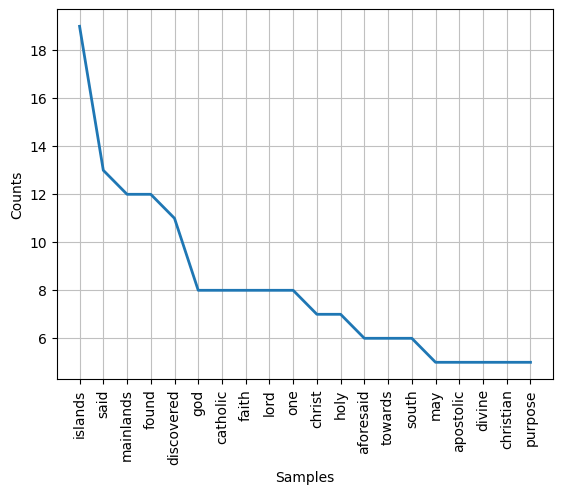

<Axes: xlabel='Samples', ylabel='Counts'>

In [51]:
# Remove punctuation from the list
intcat_without_punctuation = [word for word in intcat if word not in string.punctuation]

# Word Frequency Distribution
freq_dist = FreqDist(intcat_without_punctuation)
freq_dist.plot(20, cumulative=False)

Step 5: Topic Modeling
We'll use LDA to identify prominent topics in the text.

In [54]:
# Preparing data for LDA
dictionary = corpora.Dictionary([intcat])
corpus = [dictionary.doc2bow(text) for text in [intcat]]
lda_model = models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Print the Keyword in the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=[intcat], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Visualizing the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.150*"," + 0.017*"." + 0.015*"islands" + 0.010*"said" + 0.010*"mainlands" + 0.010*"found" + 0.009*"discovered" + 0.007*"one" + 0.007*"god" + 0.007*"lord"
Topic: 1 
Words: 0.003*"," + 0.002*"." + 0.002*"islands" + 0.002*"found" + 0.002*"said" + 0.002*"mainlands" + 0.002*"discovered" + 0.002*"holy" + 0.002*"faith" + 0.002*"catholic"
Topic: 2 
Words: 0.002*"," + 0.002*"islands" + 0.002*"." + 0.002*"said" + 0.002*"found" + 0.002*"faith" + 0.002*"mainlands" + 0.002*"discovered" + 0.002*"one" + 0.002*"lord"

Coherence Score:  0.23055674032544723


BrokenProcessPool: ignored

Step 6: Comparative Text Analysis
We'll compare the frequency and context of key words.

In [43]:
# Comparative analysis
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([" ".join(intcat)])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(word_freq)

   1493  accomplish  accomplished  accord  accordance  acquired  actual  \
0     1           1             1       3           1         1       2   

   aforesaid  aid  alexander  ...  witnessed  works  world  worship  worthy  \
0          6    1          2  ...          1      1      1        1       2   

   would  wrath  year  yoke  zeal  
0      3      1     3     1     2  

[1 rows x 503 columns]


Step 7: Visualizations and Reporting
We'll create visualizations to effectively communicate our findings.

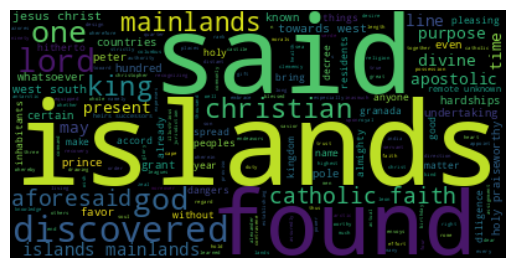

In [44]:
# Example: Creating a Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(" ".join(intcat))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Step 9: Further Research and Analysis
Suggestions for further research and analysis go here.

Step 10: Ethical Considerations
Reflect on the ethical aspects of analyzing such historical texts.

Step 11: Limitations and Future Work
Acknowledge the limitations due to the small size of the dataset and propose future research directions.